In [1]:
import matplotlib.pyplot as plt, argparse, numpy as np, math, sys, copy
from skimage.segmentation import slic, mark_boundaries, felzenszwalb
from skimage.util import img_as_float
from scipy.cluster import hierarchy
from skimage import io
from collections import defaultdict
import numpy as np
import SPHC as sphc
import util as ut

Done


In [2]:
imagePath = 'images/'
segmPath = 'images/segmentation/'
borderPath = 'images/borders/'
ultraPath = 'images/ultrametric/'
groundPath = 'BSDS500/data/groundTruth/train/'
trainPath = 'BSDS500/data/images/train/'
imageFiles = ['3063.jpg'] #, '71076.jpg', '100007.jpg', '101084.jpg', '385039.jpg']

In [4]:
for file in imageFiles:
    image = img_as_float(io.imread((imagePath + file)))
    ut.process_image(image, save=True, filename = file, paths=[segmPath, borderPath, ultraPath])
    
print('Done')

Done


/home/falreis/anaconda3/envs/paa/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


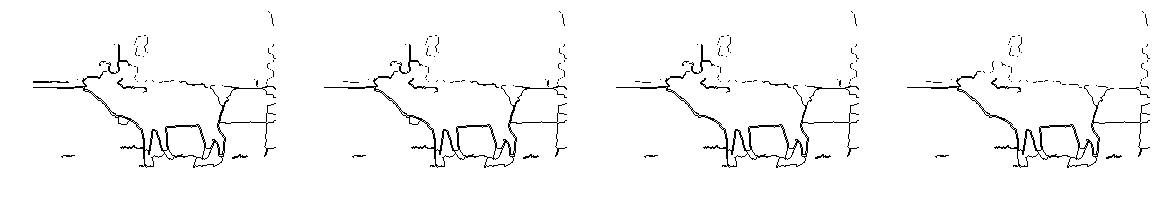

In [15]:
import process_ground_truth as pgt

ground_base = pgt.get_groundTruth((groundPath + '41004.mat'))
ground_shape = (ground_base.shape[0], ground_base.shape[1], 3)

img = np.zeros(ground_shape,dtype=np.uint8) #create blank image to save
for i in range(3):
    img[:, :, i] = ground_base[:,:, 0]

image = img_as_float(io.imread((trainPath + '41004.jpg')))
_, fs_borders, ult = ut.process_image(image, save=False, filename = file, paths=[segmPath, borderPath, ultraPath])
    
ut.plot_compare_4(ult, [], True)